In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import models
import shutil
TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/Fire model/FIRE-SMOKE-DATASET/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/Fire model/FIRE-SMOKE-DATASET/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 386s 27s/step - loss: 14.3695 - acc: 0.6361 - val_loss: 0.1851 - val_acc: 0.9235
Epoch 2/20
14/14 [==============================] - 25s 2s/step - loss: 0.1295 - acc: 0.9447 - val_loss: 0.1207 - val_acc: 0.9541
Epoch 3/20
14/14 [==============================] - 25s 2s/step - loss: 0.1536 - acc: 0.9500 - val_loss: 0.2605 - val_acc: 0.9133
Epoch 4/20
14/14 [==============================] - 25s 2s/step - loss: 0.1369 - acc: 0.9609 - val_loss: 0.3222 - val_acc: 0.9541
Epoch 5/20
14/14 [==============================] - 25s 2s/step - loss: 0.1462 - acc: 0.9624 - val_loss: 0.1415 - val_acc: 0.9541
Epoch 6/20
14/14 [==============================] - 25s 2s/step - loss: 0.1103 - acc: 0.9635 - val_loss: 0.2249 - val_acc: 0.9133
Epoch 7/20
14/14 [==============================] - 24s 2s/step - loss: 0.0832 - acc: 0.9709 - val_loss: 0.2940 - val_acc: 0.9286
Epoch 8/20
14/14 [==============================] - 24s 2s/step - loss: 0.3163 - acc: 0

In [ ]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 30s 2s/step - loss: 0.9315 - acc: 0.7123 - val_loss: 0.1504 - val_acc: 0.9643
Epoch 2/10
14/14 [==============================] - 25s 2s/step - loss: 0.5399 - acc: 0.7961 - val_loss: 0.1357 - val_acc: 0.9643
Epoch 3/10
14/14 [==============================] - 25s 2s/step - loss: 0.2981 - acc: 0.8666 - val_loss: 0.1277 - val_acc: 0.9643
Epoch 4/10
14/14 [==============================] - 25s 2s/step - loss: 0.2194 - acc: 0.8985 - val_loss: 0.1223 - val_acc: 0.9541
Epoch 5/10
14/14 [==============================] - 25s 2s/step - loss: 0.1233 - acc: 0.9419 - val_loss: 0.1213 - val_acc: 0.9541
Epoch 6/10
14/14 [==============================] - 25s 2s/step - loss: 0.1434 - acc: 0.9392 - val_loss: 0.1210 - val_acc: 0.9490
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.1004 - acc: 0.9656 - val_loss: 0.1203 - val_acc: 0.9439
Epoch 8/10
14/14 [==============================] - 25s 2s/step - loss: 0.0826 - acc: 0.96

In [3]:
from keras import models
#model.save('/content/drive/MyDrive/Colab Notebooks/InceptionV3.h5')
model = models.load_model('/content/drive/MyDrive/Colab Notebooks/InceptionV3.h5')

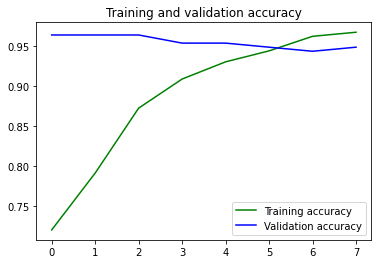

<Figure size 432x288 with 0 Axes>

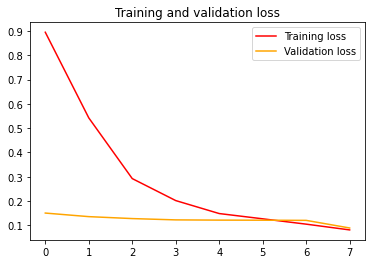

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [4]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving house-fire.jpg to house-fire (1).jpg
True 0.99999905


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename='video.mp4'):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab, 
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;
      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has 
      // been successfully started. Since this is async, the function will be 
      // paused until this has started playing. 
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

In [ ]:
# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode

video_width = 300

video_path = record_video()
video_file = open(video_path, "r+b").read()

video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image

#Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Fire model/InceptionV3.h5')
video = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Fire model/video.mp4')

while True:
        grabbed, frame = video.read()
        if not grabbed:
          print('No Data Available')
          break
#Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')
#Resizing into 224x224 because we trained the model with this image size.
        im = im.resize((224,224))
        img_array = image.img_to_array(im)
        img_array = np.expand_dims(img_array, axis=0) / 255
        probabilities = model.predict(img_array)[0]
        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        #if prediction is 0, which means there is fire in the frame.
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                print("Fire Detection: Estimated Probability {}".format(probabilities[prediction]))
                cv2_imshow(frame)
                key=cv2.waitKey(1)
                if key == ord('q'):
                    break
        #cv2.imshow("output", frame)
        #cv2_imshow(frame)
        #key=cv2.waitKey(1)
        #if key == ord('q'):
          #break

cv2.destroyAllWindows()
video.release()

Output hidden; open in https://colab.research.google.com to view.